In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
Train_data = pd.read_csv('One-Hot/Scaled/Train_Scaled_Cont_OH.csv')
Validation_data = pd.read_csv('One-Hot/Scaled/Train_Scaled_Cont_OH.csv')
Test_data = pd.read_csv('One-Hot/Scaled/Train_Scaled_Cont_OH.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         12000 non-null  float64
 1   AnnualIncome                12000 non-null  float64
 2   CreditScore                 12000 non-null  float64
 3   EmploymentStatus            12000 non-null  int64  
 4   EducationLevel              12000 non-null  int64  
 5   Experience                  12000 non-null  float64
 6   LoanAmount                  12000 non-null  float64
 7   LoanDuration                12000 non-null  float64
 8   MaritalStatus               12000 non-null  int64  
 9   NumberOfDependents          12000 non-null  float64
 10  HomeOwnershipStatus         12000 non-null  int64  
 11  MonthlyDebtPayments         12000 non-null  float64
 12  CreditCardUtilizationRate   12000 non-null  float64
 13  NumberOfOpenCreditLines     120

In [24]:
Train_data.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,1.487718,-0.305854,-1.172820,0,0,1.549408,-0.674158,-1.226708,1,0.342057,...,-0.830534,-0.707898,-1.340131,-0.327901,-0.120724,0.498070,-0.088823,0.505214,0,0.030033
1,-0.740634,-0.364793,0.315682,0,3,-1.006777,1.288418,1.217582,1,1.776507,...,-0.358890,-0.655377,0.441316,0.194702,0.968318,2.112439,0.565780,0.083891,0,-0.098772
2,0.030718,0.698946,0.746564,0,3,0.050955,-0.530405,-0.737850,0,1.776507,...,0.720578,-0.634868,-1.340131,-0.311338,-1.167424,-0.582772,-0.354121,-0.702282,0,0.287644
3,1.659129,3.766004,1.862940,0,2,1.637552,-0.381553,0.239866,1,-1.092394,...,3.832985,0.895194,-0.894769,-0.005362,-1.350636,-1.302610,-0.601173,-1.033090,1,-2.211181
4,-0.654928,-0.121030,0.061069,0,4,-0.477911,0.913035,-0.248992,0,-0.375169,...,-0.111522,-0.792593,-0.449407,-0.535198,0.161041,0.107046,0.462228,-0.034117,0,0.287644


In [25]:
X_training = Train_data.drop('LoanApproved',axis=1)
X_training = Train_data.drop('RiskScore',axis=1)
y_training = Train_data['LoanApproved']

In [27]:
X_validation = Validation_data.drop('LoanApproved',axis=1)
X_validation = Validation_data.drop('RiskScore',axis=1)
y_validation = Validation_data['LoanApproved']

In [28]:
X_testing = Test_data.drop('LoanApproved',axis=1)
X_testing = Test_data.drop('RiskScore',axis=1)
y_testing = Test_data['LoanApproved']

In [7]:
class SingleLayer(nn.Module):
    def __init__(self, input_size, hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [8]:
X_training = X_training.values
y_training = y_training.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_testing.values
y_testing = y_testing.values

In [9]:
print(y_training)

[0 0 0 ... 1 0 0]


In [10]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

Training Losses are 
          0
0  0.785755
1  0.781743
2  0.777795
3  0.773911
4  0.770089
Validation Data
Confusion Matrix for hidden layer 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8
[[3044    0]
 [ 955    1]]
Accuracy: 0.7612, Precision: 1.0000, Recall: 0.0010, F1-score: 0.0021



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


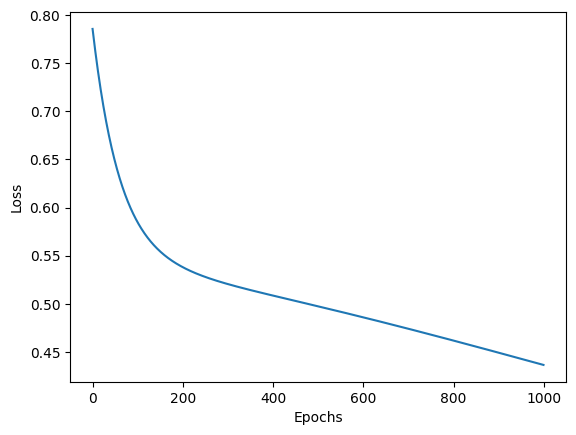

Training Losses are 
          0
0  0.702123
1  0.697789
2  0.693567
3  0.689455
4  0.685449
Validation Data
Confusion Matrix for hidden layer 16
[[3044    0]
 [ 897   59]]
Accuracy: 0.7758, Precision: 1.0000, Recall: 0.0617, F1-score: 0.1163

Test Data
Confusion Matrix for hiden layer 16
[[3044    0]
 [ 892   64]]
Accuracy: 0.7770, Precision: 1.0000, Recall: 0.0669, F1-score: 0.1255



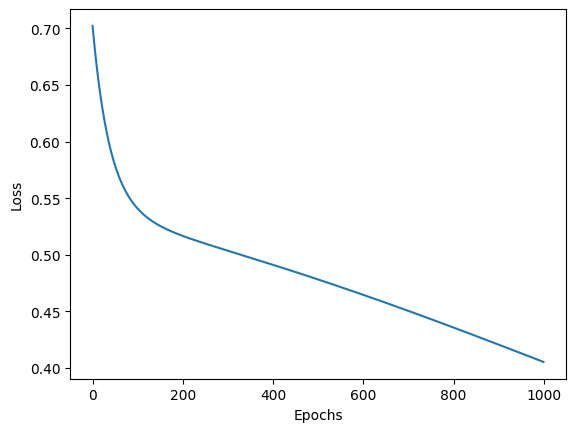

Training Losses are 
          0
0  0.659585
1  0.654764
2  0.650161
3  0.645763
4  0.641563
Validation Data
Confusion Matrix for hidden layer 32
[[3044    0]
 [ 907   49]]
Accuracy: 0.7732, Precision: 1.0000, Recall: 0.0513, F1-score: 0.0975

Test Data
Confusion Matrix for hiden layer 32
[[3044    0]
 [ 895   61]]
Accuracy: 0.7762, Precision: 1.0000, Recall: 0.0638, F1-score: 0.1200



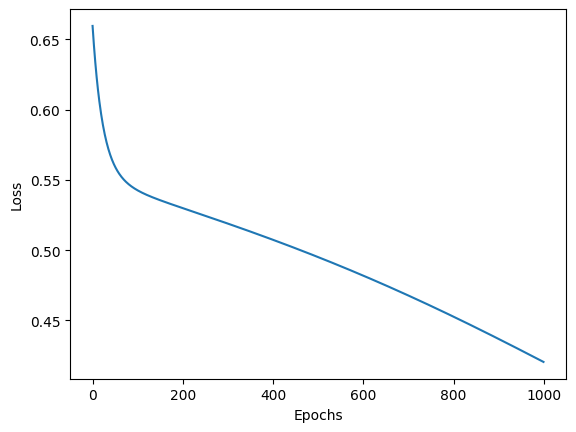

Training Losses are 
          0
0  0.804603
1  0.783436
2  0.764073
3  0.746374
4  0.730204
Validation Data
Confusion Matrix for hidden layer 64
[[3044    0]
 [ 854  102]]
Accuracy: 0.7865, Precision: 1.0000, Recall: 0.1067, F1-score: 0.1928

Test Data
Confusion Matrix for hiden layer 64
[[3044    0]
 [ 841  115]]
Accuracy: 0.7897, Precision: 1.0000, Recall: 0.1203, F1-score: 0.2148



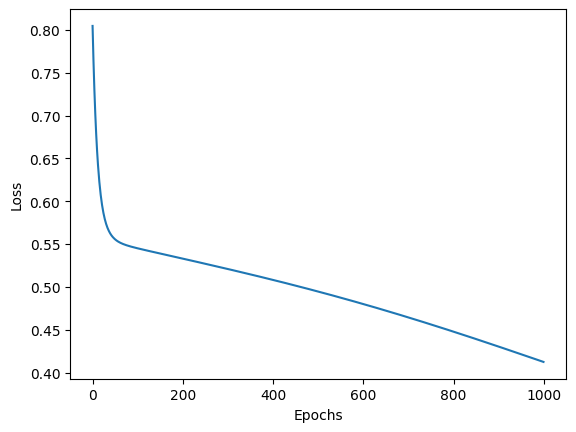

Training Losses are 
          0
0  0.607730
1  0.599219
2  0.592002
3  0.585864
4  0.580629
Validation Data
Confusion Matrix for hidden layer 128
[[3044    0]
 [ 642  314]]
Accuracy: 0.8395, Precision: 1.0000, Recall: 0.3285, F1-score: 0.4945

Test Data
Confusion Matrix for hiden layer 128
[[3042    2]
 [ 629  327]]
Accuracy: 0.8423, Precision: 0.9939, Recall: 0.3421, F1-score: 0.5089



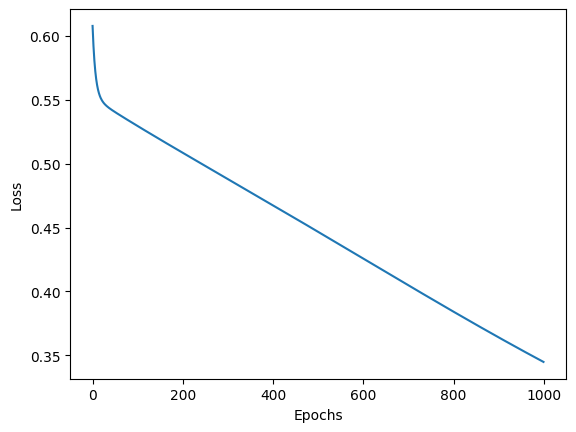

Best accuracy for test data is 0.84225 for degree 128


In [12]:
nuerons = [8,16,32,64,128]
min_loss = 0
best_degree = 1000
for nueron in nuerons:
  model = SingleLayer(34,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.SGD(model.parameters(), lr=0.01)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss:
    min_loss = acc
    best_degree = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss} for degree {best_degree}")

Training Losses are 
          0
0  0.682596
1  0.680367
2  0.678145
3  0.675931
4  0.673723
Validation Data
Confusion Matrix for hidden layer 8
[[3030   14]
 [  41  915]]
Accuracy: 0.9862, Precision: 0.9849, Recall: 0.9571, F1-score: 0.9708

Test Data
Confusion Matrix for hiden layer 8
[[3028   16]
 [  35  921]]
Accuracy: 0.9872, Precision: 0.9829, Recall: 0.9634, F1-score: 0.9731



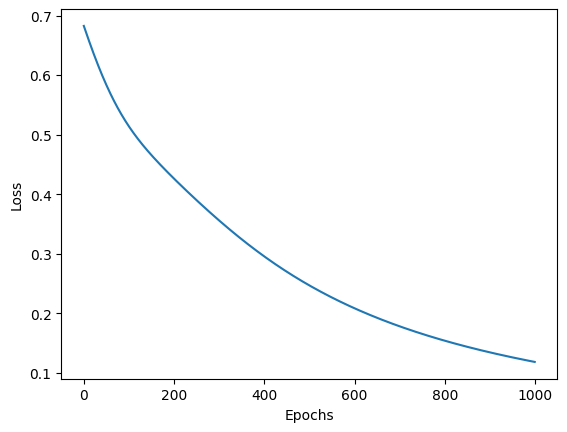

Training Losses are 
          0
0  0.711828
1  0.707928
2  0.704058
3  0.700219
4  0.696411
Validation Data
Confusion Matrix for hidden layer 16
[[3030   14]
 [  25  931]]
Accuracy: 0.9902, Precision: 0.9852, Recall: 0.9738, F1-score: 0.9795

Test Data
Confusion Matrix for hiden layer 16
[[3024   20]
 [  17  939]]
Accuracy: 0.9908, Precision: 0.9791, Recall: 0.9822, F1-score: 0.9807



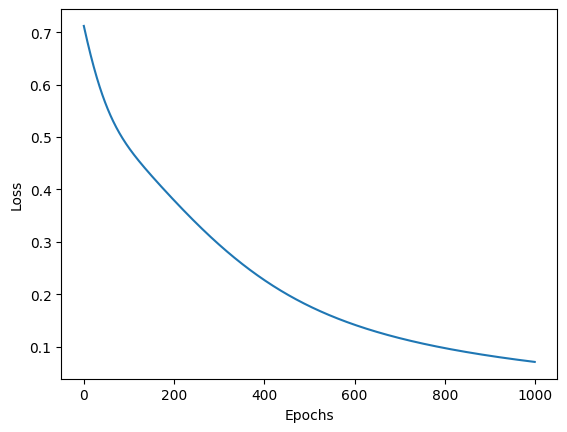

Training Losses are 
          0
0  0.972954
1  0.962071
2  0.951334
3  0.940743
4  0.930303
Validation Data
Confusion Matrix for hidden layer 32
[[3030   14]
 [  23  933]]
Accuracy: 0.9908, Precision: 0.9852, Recall: 0.9759, F1-score: 0.9806

Test Data
Confusion Matrix for hiden layer 32
[[3028   16]
 [  14  942]]
Accuracy: 0.9925, Precision: 0.9833, Recall: 0.9854, F1-score: 0.9843



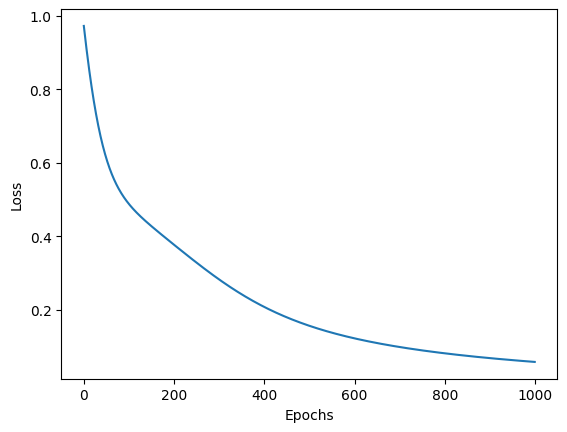

Training Losses are 
          0
0  0.772534
1  0.759013
2  0.745872
3  0.733118
4  0.720758
Validation Data
Confusion Matrix for hidden layer 64
[[3040    4]
 [   5  951]]
Accuracy: 0.9978, Precision: 0.9958, Recall: 0.9948, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 64
[[3038    6]
 [   7  949]]
Accuracy: 0.9968, Precision: 0.9937, Recall: 0.9927, F1-score: 0.9932



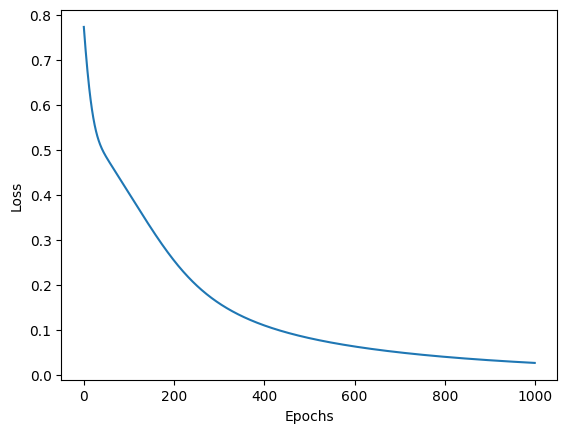

Training Losses are 
          0
0  0.675921
1  0.656460
2  0.638454
3  0.621911
4  0.606823
Validation Data
Confusion Matrix for hidden layer 128
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979

Test Data
Confusion Matrix for hiden layer 128
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979



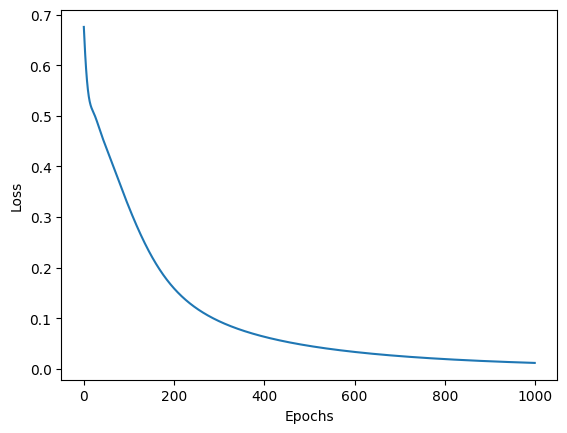

Best accuracy for test data is 0.999 for degree 128


In [14]:
nuerons = [8,16,32,64,128]
min_loss_2 = 0
best_degree_2 = 1000
for nueron in nuerons:
  model = SingleLayer(34,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.Adam(model.parameters(), lr=0.001)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss_2:
    min_loss_2 = acc
    best_degree_2 = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss_2} for degree {best_degree_2}")
  #HARDWARE PROBELM MIGHT WORK BETTER WITH A GOOD HARDWARE

In [16]:
class DoubleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.948772
1  0.942591
2  0.936503
3  0.930507
4  0.924600
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


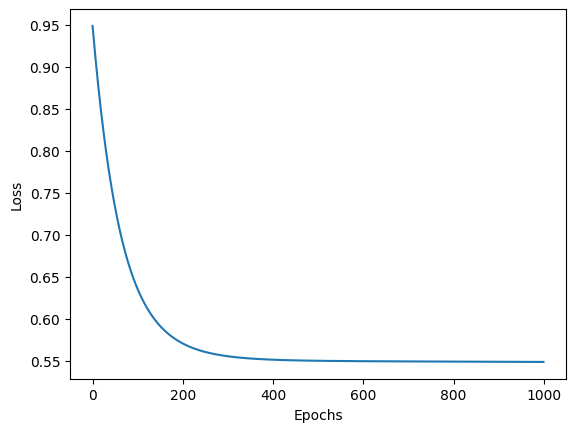

Training Losses are 
          0
0  0.683039
1  0.679845
2  0.676731
3  0.673696
4  0.670738
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


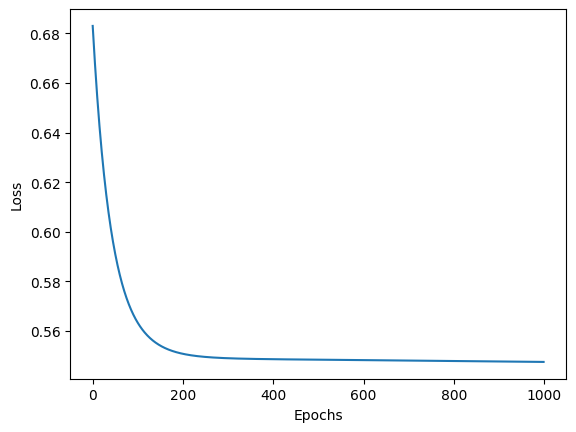

Training Losses are 
          0
0  0.755501
1  0.746661
2  0.738212
3  0.730137
4  0.722420
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


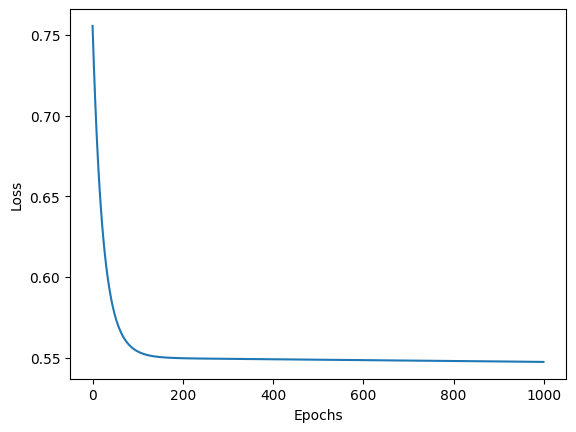

Training Losses are 
          0
0  0.641590
1  0.633494
2  0.626158
3  0.619507
4  0.613474
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


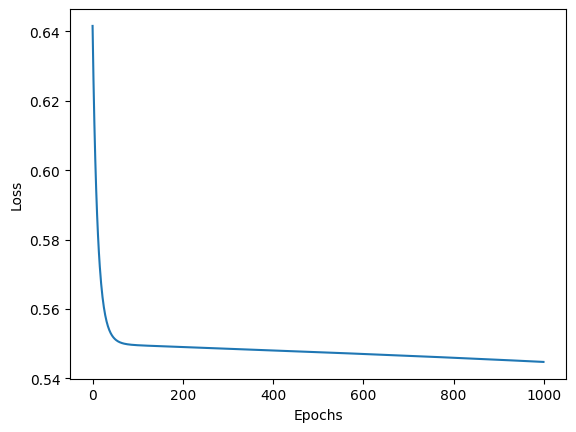

Training Losses are 
          0
0  0.683124
1  0.681181
2  0.679268
3  0.677384
4  0.675529
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


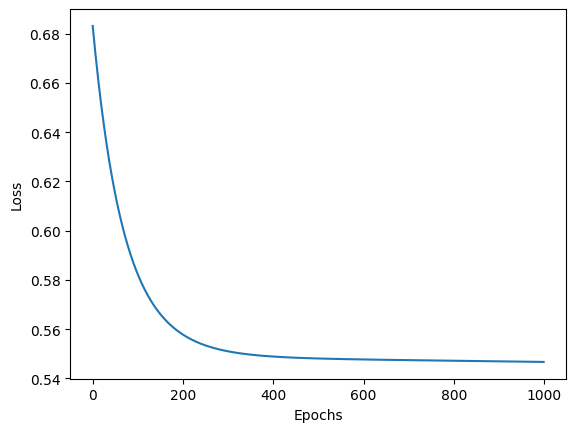

Training Losses are 
          0
0  0.606495
1  0.605403
2  0.604333
3  0.603286
4  0.602261
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


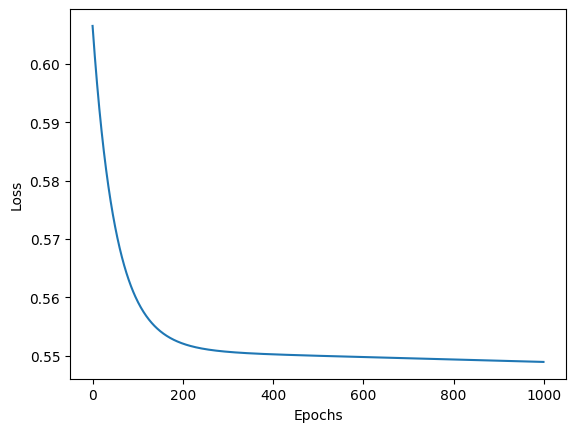

Training Losses are 
          0
0  0.723256
1  0.715357
2  0.707827
3  0.700647
4  0.693803
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


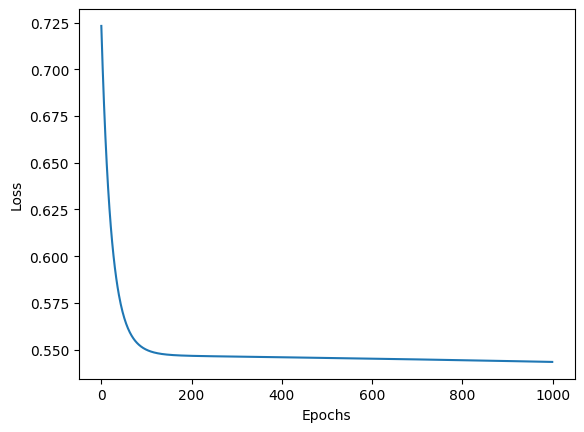

Training Losses are 
          0
0  0.724803
1  0.709978
2  0.696471
3  0.684166
4  0.672956
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


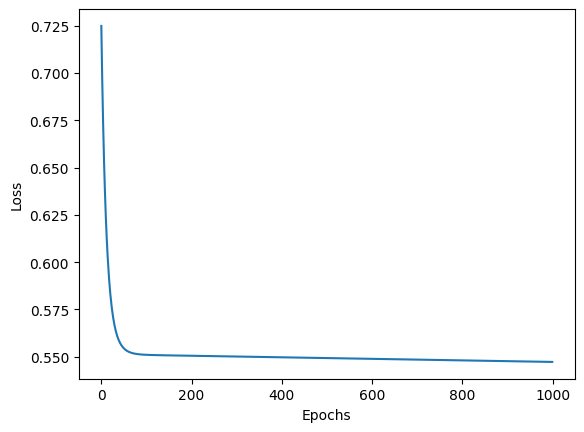

Training Losses are 
          0
0  0.600943
1  0.600200
2  0.599467
3  0.598746
4  0.598036
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


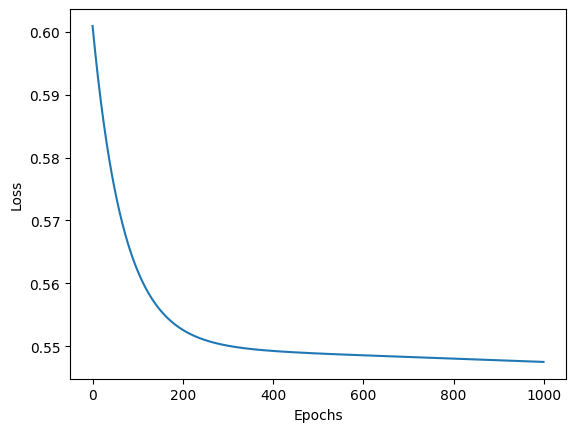

Training Losses are 
          0
0  0.724667
1  0.720395
2  0.716230
3  0.712170
4  0.708213
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


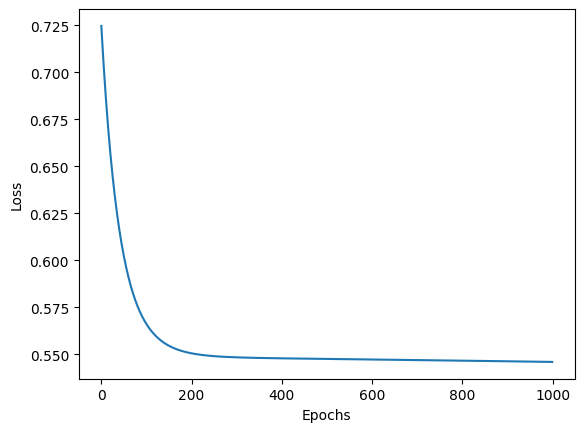

Training Losses are 
          0
0  0.848706
1  0.834610
2  0.821172
3  0.808366
4  0.796165
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


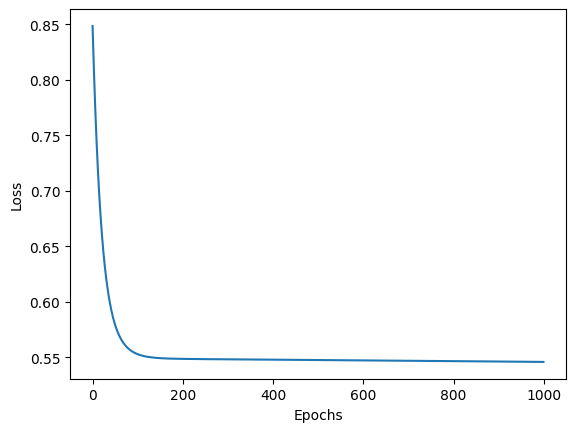

Training Losses are 
          0
0  0.678558
1  0.668300
2  0.658898
3  0.650280
4  0.642377
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


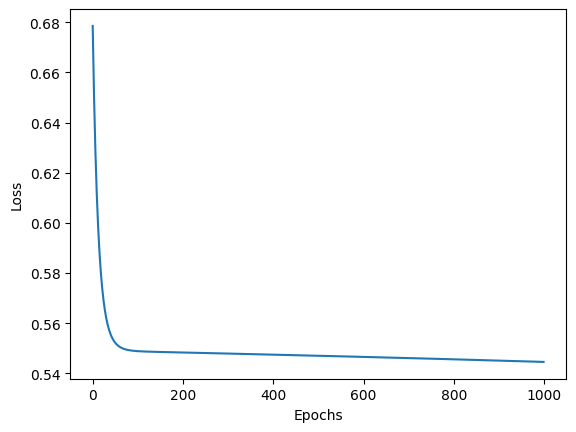

Training Losses are 
          0
0  0.691404
1  0.689126
2  0.686888
3  0.684689
4  0.682528
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


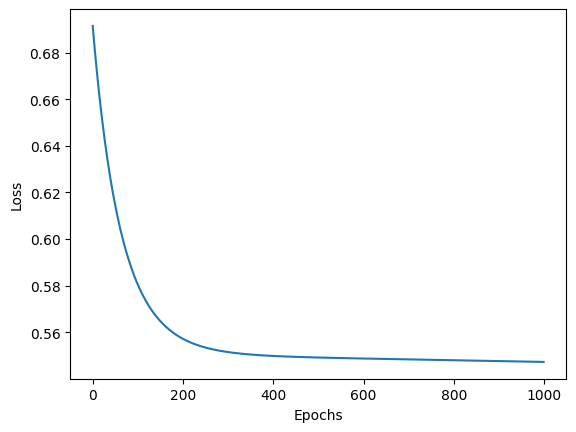

Training Losses are 
          0
0  0.740288
1  0.734925
2  0.729718
3  0.724663
4  0.719756
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


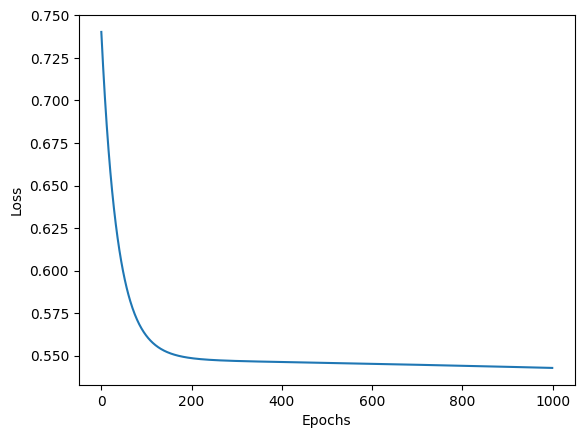

Training Losses are 
          0
0  0.737939
1  0.729596
2  0.721637
3  0.714046
4  0.706806
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


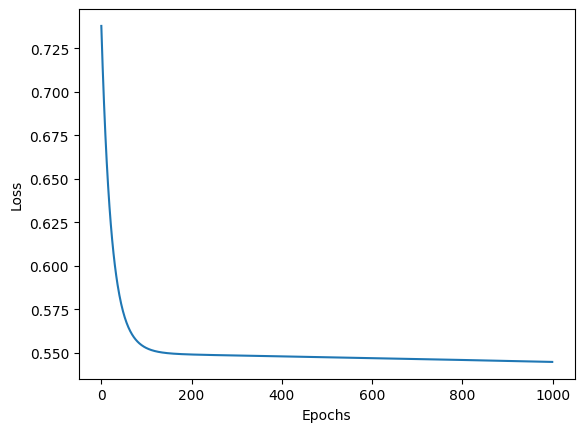

Training Losses are 
          0
0  0.710423
1  0.696899
2  0.684565
3  0.673316
4  0.663055
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


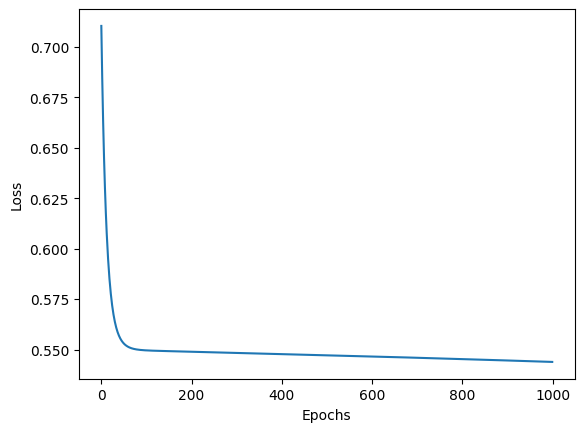

Best accuracy for test data is 0.761 for degree 8


In [17]:
nuerons = [8,16,32,64]
best_accuracy_1=0
best_degree_3=0
for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(34,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_1:
        best_accuracy_1=acc
        best_degree_3=nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_1} for degree {best_degree_3}")

Training Losses are 
          0
0  0.635765
1  0.634393
2  0.633031
3  0.631680
4  0.630341
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3037    7]
 [  24  932]]
Accuracy: 0.9922, Precision: 0.9925, Recall: 0.9749, F1-score: 0.9836

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3034   10]
 [  17  939]]
Accuracy: 0.9932, Precision: 0.9895, Recall: 0.9822, F1-score: 0.9858



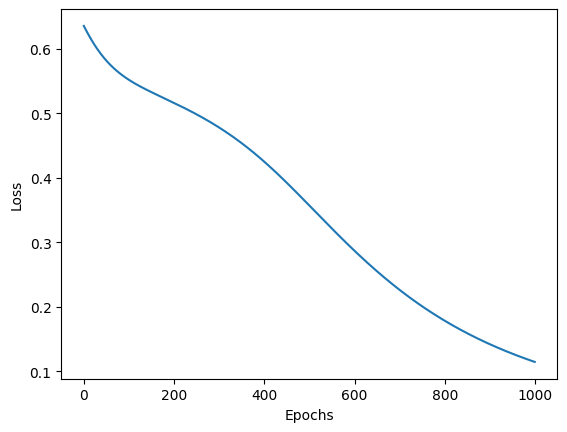

Training Losses are 
          0
0  0.621718
1  0.619547
2  0.617407
3  0.615298
4  0.613221
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[3037    7]
 [  11  945]]
Accuracy: 0.9955, Precision: 0.9926, Recall: 0.9885, F1-score: 0.9906

Test Data
Confusion Matrix for hiden layer 8 and 16
[[3035    9]
 [  10  946]]
Accuracy: 0.9952, Precision: 0.9906, Recall: 0.9895, F1-score: 0.9901



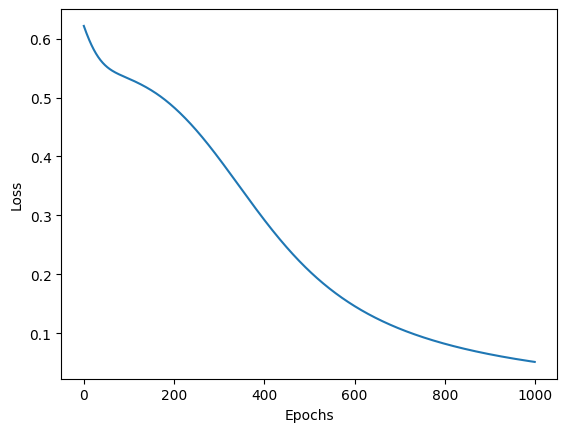

Training Losses are 
          0
0  0.637976
1  0.633987
2  0.630097
3  0.626308
4  0.622622
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[3039    5]
 [   4  952]]
Accuracy: 0.9978, Precision: 0.9948, Recall: 0.9958, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 8 and 32
[[3038    6]
 [   7  949]]
Accuracy: 0.9968, Precision: 0.9937, Recall: 0.9927, F1-score: 0.9932



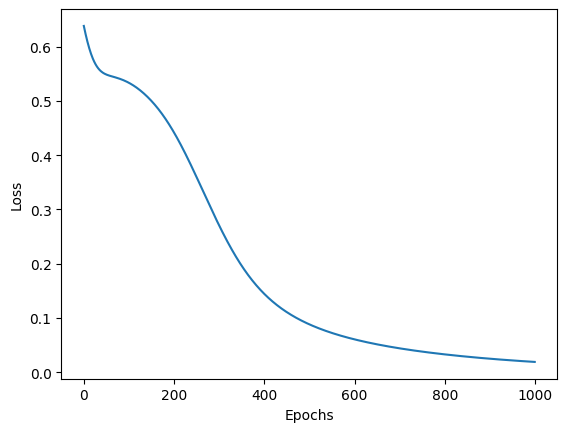

Training Losses are 
          0
0  0.888364
1  0.873084
2  0.858153
3  0.843578
4  0.829366
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[3039    5]
 [   7  949]]
Accuracy: 0.9970, Precision: 0.9948, Recall: 0.9927, F1-score: 0.9937

Test Data
Confusion Matrix for hiden layer 8 and 64
[[3038    6]
 [   7  949]]
Accuracy: 0.9968, Precision: 0.9937, Recall: 0.9927, F1-score: 0.9932



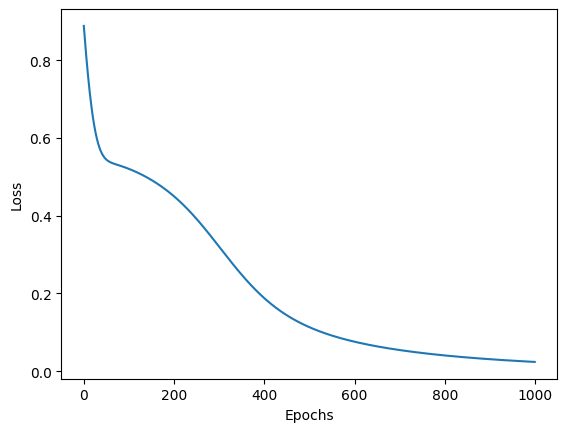

Training Losses are 
          0
0  0.642004
1  0.640299
2  0.638607
3  0.636930
4  0.635267
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3039    5]
 [   8  948]]
Accuracy: 0.9968, Precision: 0.9948, Recall: 0.9916, F1-score: 0.9932

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3036    8]
 [   8  948]]
Accuracy: 0.9960, Precision: 0.9916, Recall: 0.9916, F1-score: 0.9916



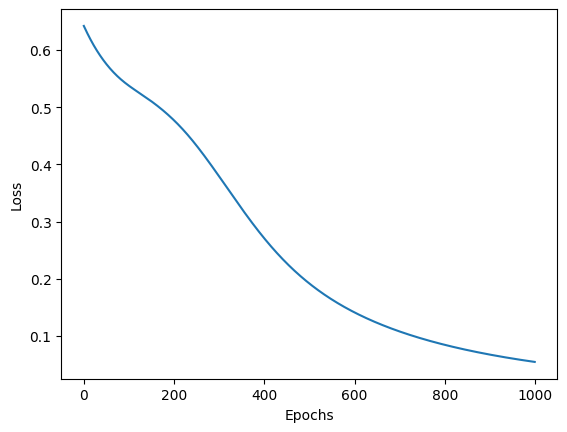

Training Losses are 
          0
0  0.600471
1  0.598346
2  0.596261
3  0.594216
4  0.592212
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[3038    6]
 [   4  952]]
Accuracy: 0.9975, Precision: 0.9937, Recall: 0.9958, F1-score: 0.9948

Test Data
Confusion Matrix for hiden layer 16 and 16
[[3038    6]
 [   6  950]]
Accuracy: 0.9970, Precision: 0.9937, Recall: 0.9937, F1-score: 0.9937



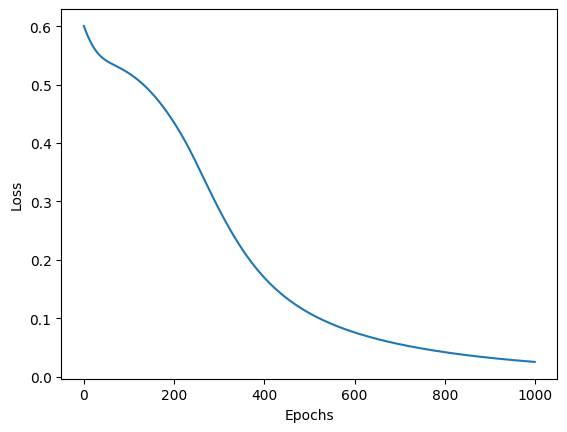

Training Losses are 
          0
0  0.810449
1  0.802339
2  0.794361
3  0.786515
4  0.778803
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[3039    5]
 [   3  953]]
Accuracy: 0.9980, Precision: 0.9948, Recall: 0.9969, F1-score: 0.9958

Test Data
Confusion Matrix for hiden layer 16 and 32
[[3038    6]
 [   6  950]]
Accuracy: 0.9970, Precision: 0.9937, Recall: 0.9937, F1-score: 0.9937



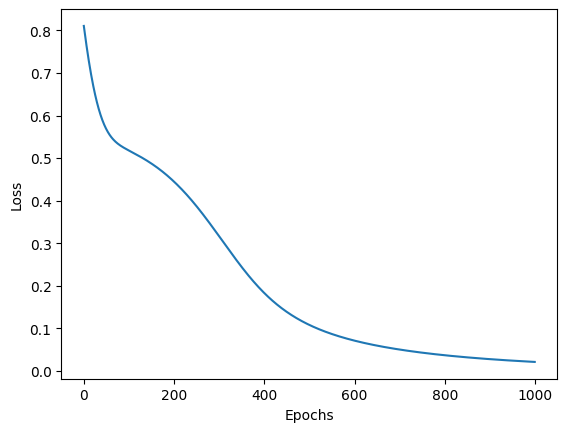

Training Losses are 
          0
0  0.654695
1  0.645427
2  0.636620
3  0.628280
4  0.620411
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995

Test Data
Confusion Matrix for hiden layer 16 and 64
[[3043    1]
 [   1  955]]
Accuracy: 0.9995, Precision: 0.9990, Recall: 0.9990, F1-score: 0.9990



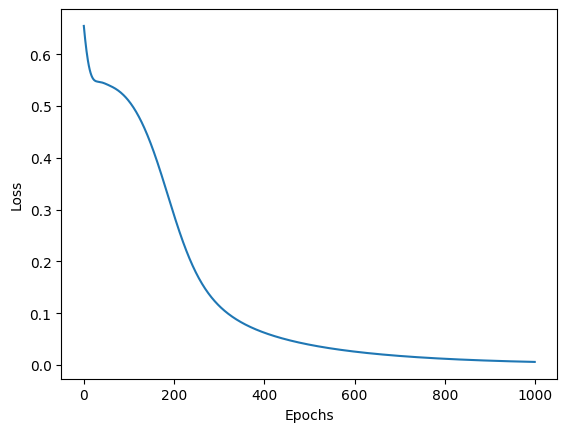

Training Losses are 
          0
0  0.779764
1  0.776463
2  0.773188
3  0.769937
4  0.766713
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[3041    3]
 [   6  950]]
Accuracy: 0.9978, Precision: 0.9969, Recall: 0.9937, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 32 and 8
[[3040    4]
 [   7  949]]
Accuracy: 0.9972, Precision: 0.9958, Recall: 0.9927, F1-score: 0.9942



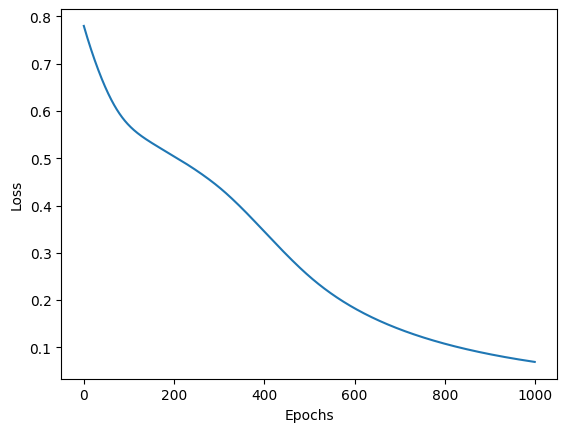

Training Losses are 
          0
0  0.759688
1  0.753344
2  0.747092
3  0.740935
4  0.734874
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[3041    3]
 [   2  954]]
Accuracy: 0.9988, Precision: 0.9969, Recall: 0.9979, F1-score: 0.9974

Test Data
Confusion Matrix for hiden layer 32 and 16
[[3041    3]
 [   3  953]]
Accuracy: 0.9985, Precision: 0.9969, Recall: 0.9969, F1-score: 0.9969



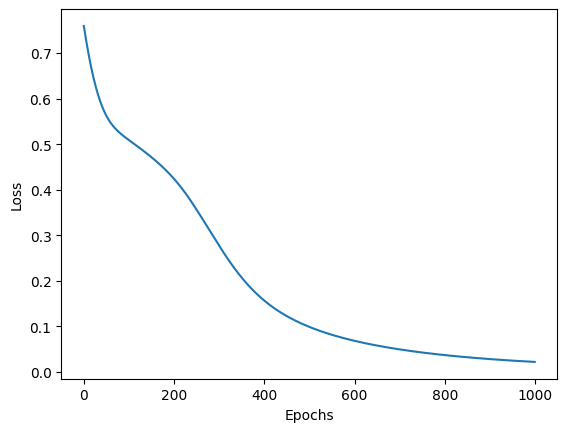

Training Losses are 
          0
0  0.952458
1  0.939502
2  0.926774
3  0.914276
4  0.902008
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[3038    6]
 [   9  947]]
Accuracy: 0.9962, Precision: 0.9937, Recall: 0.9906, F1-score: 0.9921

Test Data
Confusion Matrix for hiden layer 32 and 32
[[3037    7]
 [   9  947]]
Accuracy: 0.9960, Precision: 0.9927, Recall: 0.9906, F1-score: 0.9916



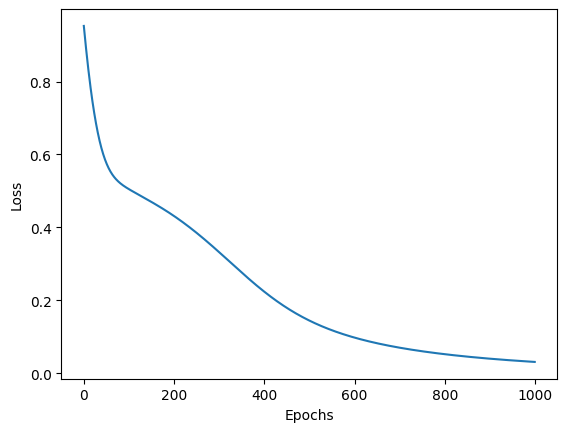

Training Losses are 
          0
0  0.704035
1  0.690322
2  0.677288
3  0.664940
4  0.653281
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 32 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



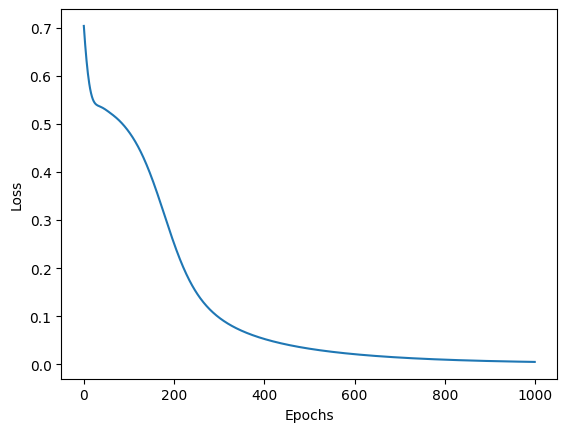

Training Losses are 
          0
0  0.605866
1  0.602742
2  0.599689
3  0.596708
4  0.593801
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[3042    2]
 [   0  956]]
Accuracy: 0.9995, Precision: 0.9979, Recall: 1.0000, F1-score: 0.9990

Test Data
Confusion Matrix for hiden layer 64 and 8
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



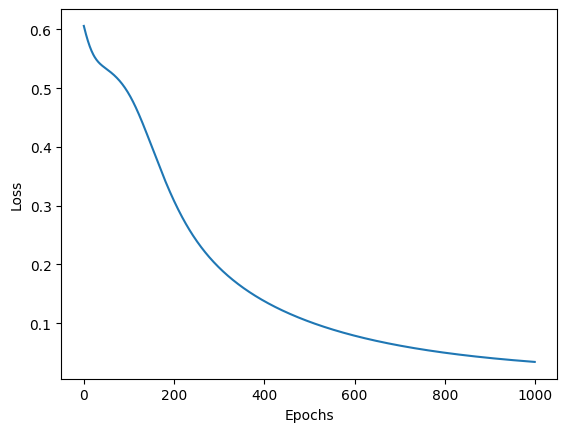

Training Losses are 
          0
0  0.648089
1  0.642038
2  0.636173
3  0.630496
4  0.625014
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995

Test Data
Confusion Matrix for hiden layer 64 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



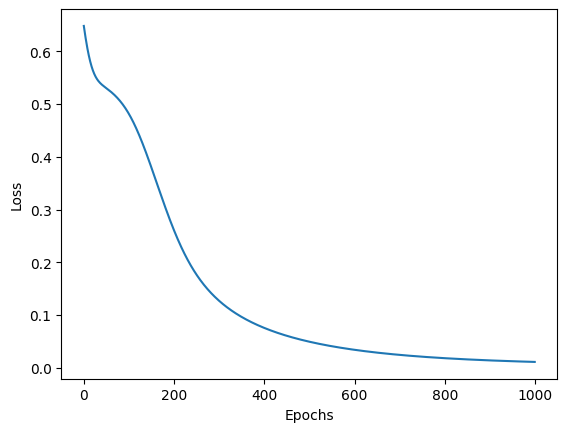

Training Losses are 
          0
0  0.712585
1  0.702279
2  0.692311
3  0.682689
4  0.673420
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[3044    0]
 [   1  955]]
Accuracy: 0.9998, Precision: 1.0000, Recall: 0.9990, F1-score: 0.9995

Test Data
Confusion Matrix for hiden layer 64 and 32
[[3044    0]
 [   1  955]]
Accuracy: 0.9998, Precision: 1.0000, Recall: 0.9990, F1-score: 0.9995



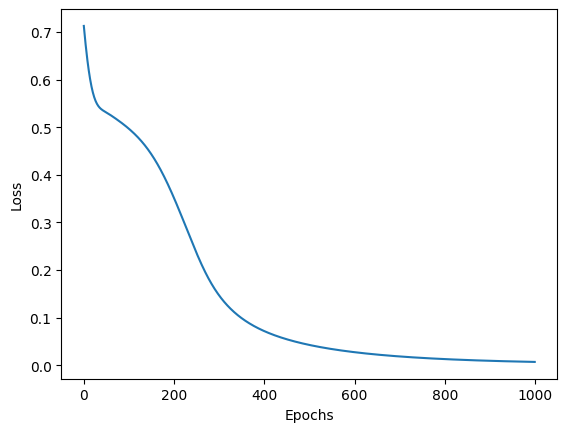

Training Losses are 
          0
0  0.619552
1  0.607837
2  0.597267
3  0.587841
4  0.579545
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 64 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



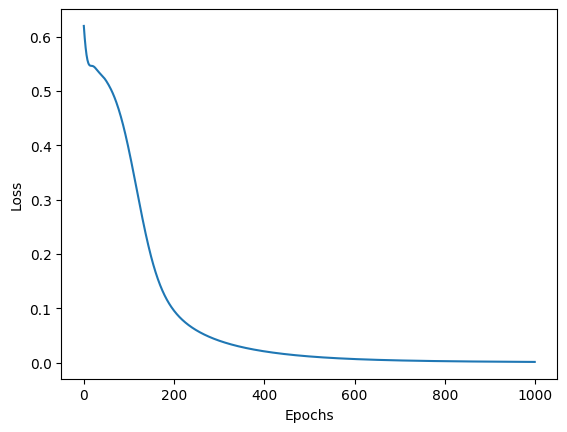

Best accuracy for test data is 1.0 for degree 32


In [18]:
nuerons = [8,16,32,64]
best_degree_3=0
best_accuracy_2=0

for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(34,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_2:
          best_accuracy_2=acc
          best_degree_4=nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_2} for degree {best_degree_4}")

In [29]:
class TripleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.615329
1  0.614253
2  0.613187
3  0.612133
4  0.611089
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[3041    3]
 [   2  954]]
Accuracy: 0.9988, Precision: 0.9969, Recall: 0.9979, F1-score: 0.9974

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[3043    1]
 [   2  954]]
Accuracy: 0.9992, Precision: 0.9990, Recall: 0.9979, F1-score: 0.9984



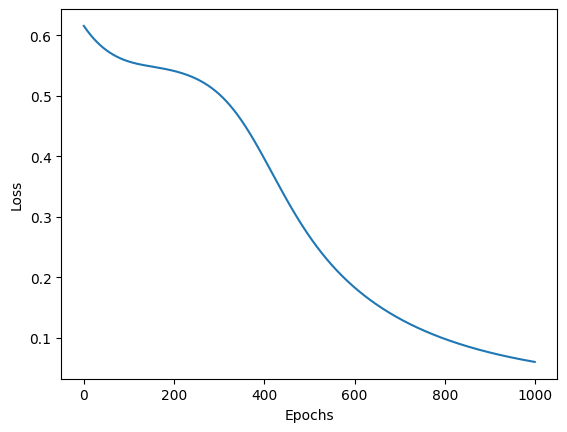

Training Losses are 
          0
0  0.675103
1  0.672106
2  0.669146
3  0.666225
4  0.663343
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[3038    6]
 [   7  949]]
Accuracy: 0.9968, Precision: 0.9937, Recall: 0.9927, F1-score: 0.9932

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[3036    8]
 [   8  948]]
Accuracy: 0.9960, Precision: 0.9916, Recall: 0.9916, F1-score: 0.9916



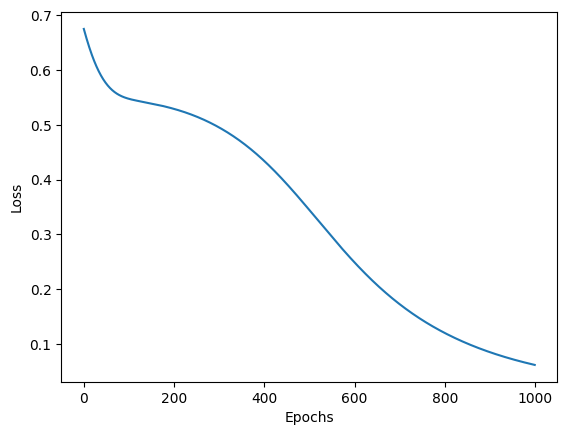

Training Losses are 
          0
0  0.784947
1  0.777905
2  0.770981
3  0.764178
4  0.757496
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979



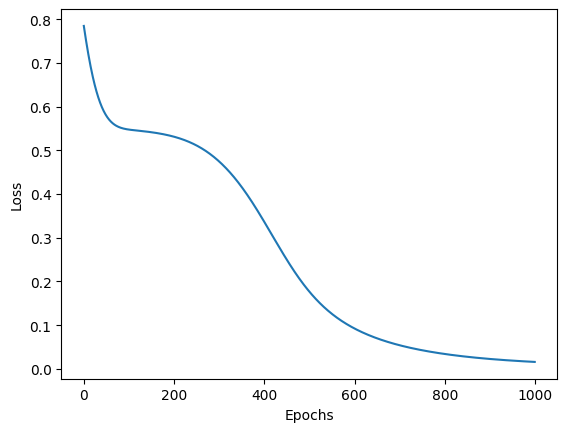

Training Losses are 
          0
0  0.693239
1  0.683684
2  0.674481
3  0.665637
4  0.657156
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[3044    0]
 [   1  955]]
Accuracy: 0.9998, Precision: 1.0000, Recall: 0.9990, F1-score: 0.9995



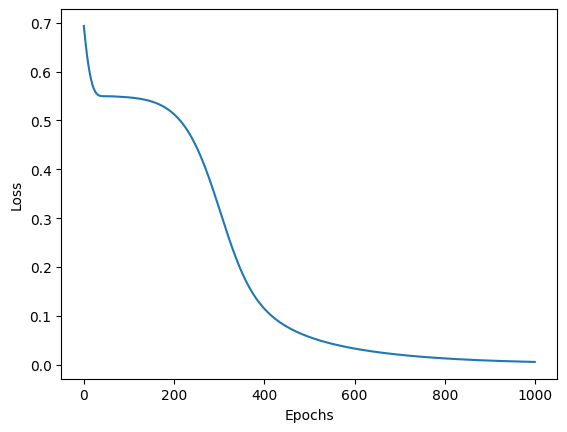

Training Losses are 
          0
0  0.691394
1  0.689346
2  0.687316
3  0.685304
4  0.683310
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[3041    3]
 [   2  954]]
Accuracy: 0.9988, Precision: 0.9969, Recall: 0.9979, F1-score: 0.9974

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[3041    3]
 [   2  954]]
Accuracy: 0.9988, Precision: 0.9969, Recall: 0.9979, F1-score: 0.9974



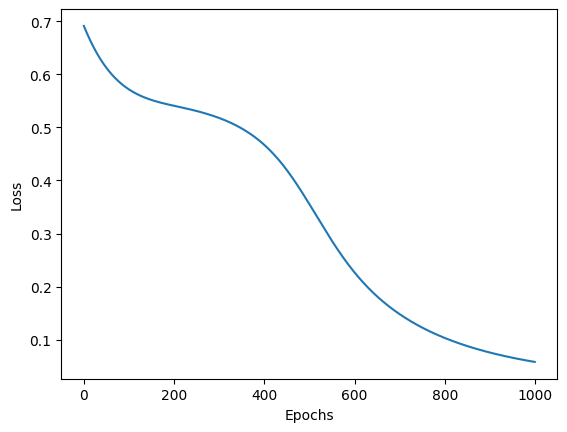

Training Losses are 
          0
0  0.651105
1  0.648138
2  0.645220
3  0.642353
4  0.639536
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[3042    2]
 [   0  956]]
Accuracy: 0.9995, Precision: 0.9979, Recall: 1.0000, F1-score: 0.9990

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[3042    2]
 [   1  955]]
Accuracy: 0.9992, Precision: 0.9979, Recall: 0.9990, F1-score: 0.9984



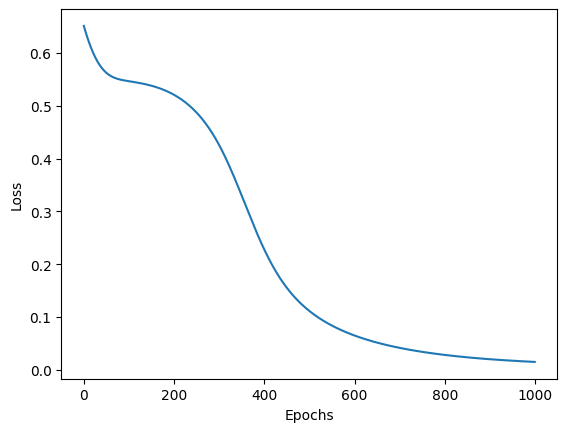

Training Losses are 
          0
0  0.832267
1  0.823828
2  0.815533
3  0.807385
4  0.799386
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[3041    3]
 [   3  953]]
Accuracy: 0.9985, Precision: 0.9969, Recall: 0.9969, F1-score: 0.9969

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[3041    3]
 [   3  953]]
Accuracy: 0.9985, Precision: 0.9969, Recall: 0.9969, F1-score: 0.9969



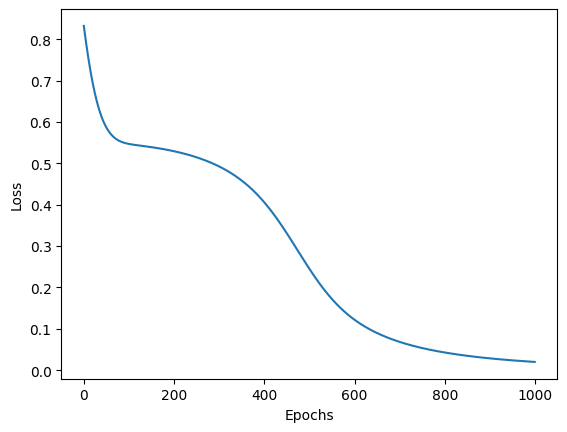

Training Losses are 
          0
0  0.644019
1  0.635531
2  0.627472
3  0.619848
4  0.612663
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



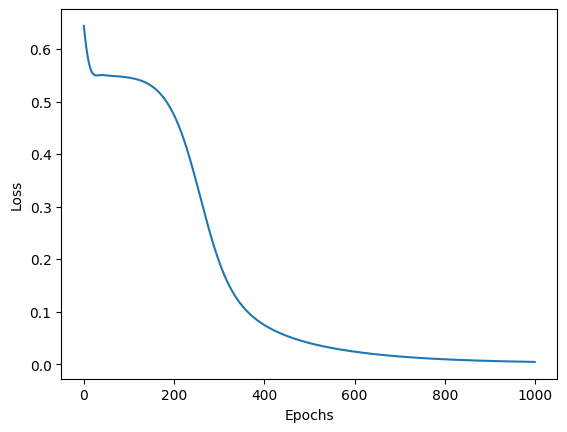

Training Losses are 
          0
0  0.621123
1  0.619224
2  0.617351
3  0.615505
4  0.613685
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[3042    2]
 [   0  956]]
Accuracy: 0.9995, Precision: 0.9979, Recall: 1.0000, F1-score: 0.9990

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[3042    2]
 [   0  956]]
Accuracy: 0.9995, Precision: 0.9979, Recall: 1.0000, F1-score: 0.9990



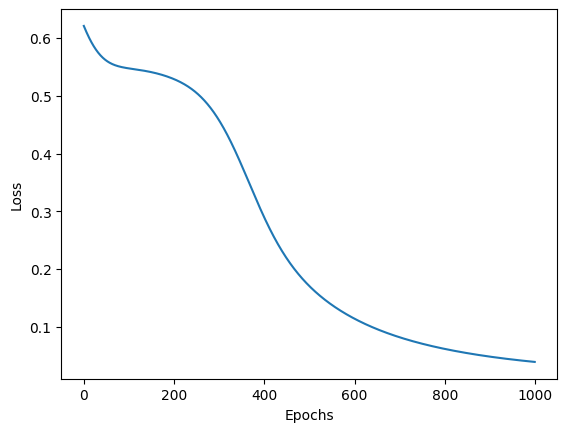

Training Losses are 
          0
0  0.619025
1  0.615517
2  0.612106
3  0.608792
4  0.605577
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[3042    2]
 [   0  956]]
Accuracy: 0.9995, Precision: 0.9979, Recall: 1.0000, F1-score: 0.9990

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995



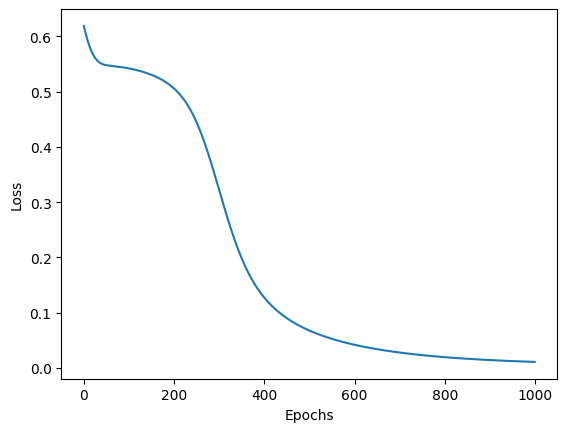

Training Losses are 
          0
0  0.683486
1  0.676408
2  0.669545
3  0.662901
4  0.656476
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[3042    2]
 [   0  956]]
Accuracy: 0.9995, Precision: 0.9979, Recall: 1.0000, F1-score: 0.9990

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[3044    0]
 [   2  954]]
Accuracy: 0.9995, Precision: 1.0000, Recall: 0.9979, F1-score: 0.9990



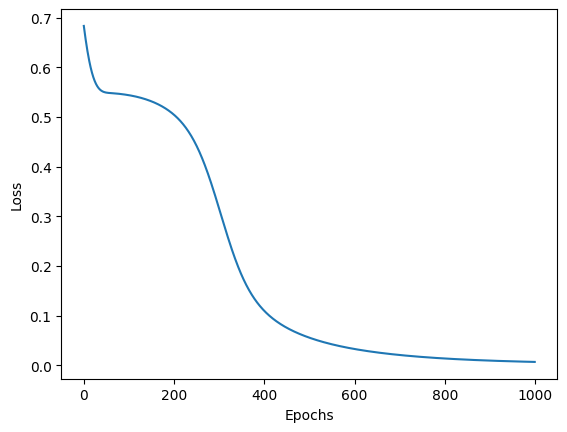

Training Losses are 
          0
0  0.642962
1  0.632845
2  0.623364
3  0.614524
4  0.606325
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



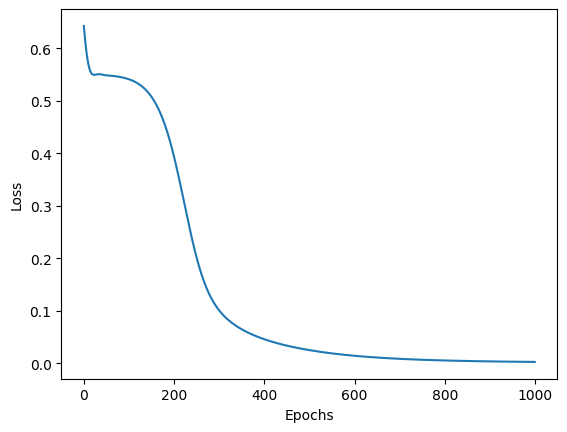

Training Losses are 
          0
0  0.753472
1  0.748621
2  0.743844
3  0.739142
4  0.734519
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[3042    2]
 [   1  955]]
Accuracy: 0.9992, Precision: 0.9979, Recall: 0.9990, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[3044    0]
 [   1  955]]
Accuracy: 0.9998, Precision: 1.0000, Recall: 0.9990, F1-score: 0.9995



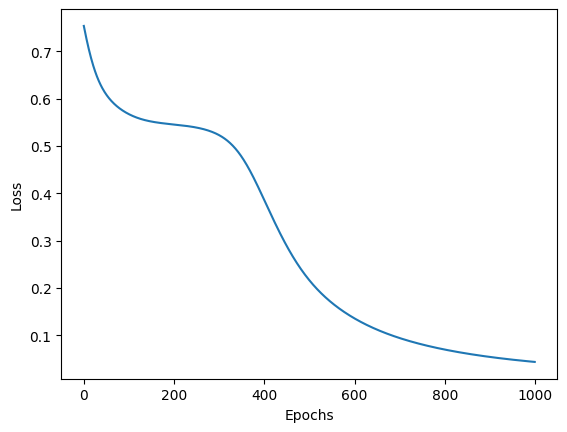

Training Losses are 
          0
0  0.665072
1  0.658627
2  0.652375
3  0.646320
4  0.640467
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[3044    0]
 [   1  955]]
Accuracy: 0.9998, Precision: 1.0000, Recall: 0.9990, F1-score: 0.9995



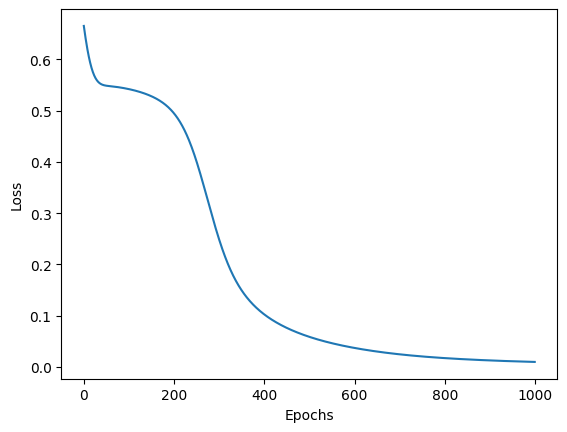

Training Losses are 
          0
0  0.699119
1  0.689132
2  0.679500
3  0.670233
4  0.661337
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[3042    2]
 [   0  956]]
Accuracy: 0.9995, Precision: 0.9979, Recall: 1.0000, F1-score: 0.9990

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



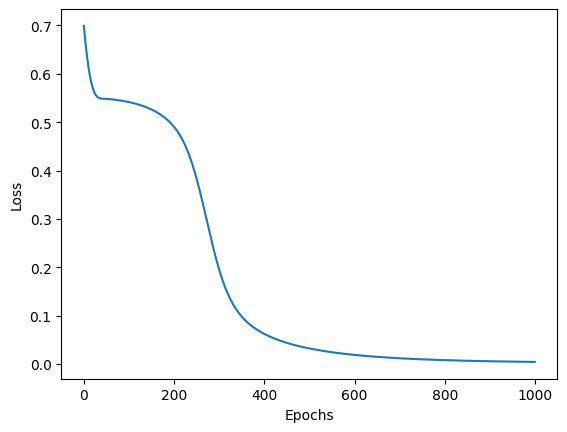

Training Losses are 
          0
0  0.811241
1  0.789354
2  0.768483
3  0.748651
4  0.729877
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



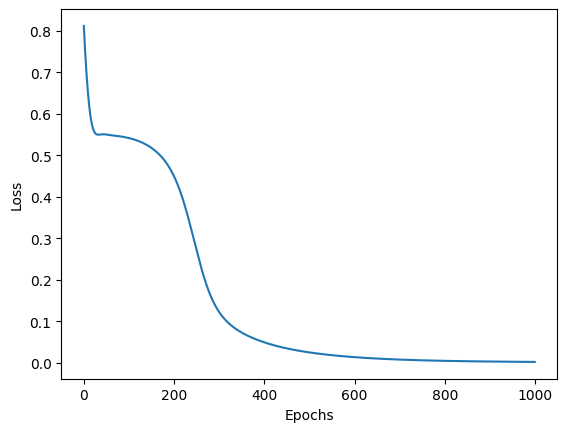

Training Losses are 
          0
0  0.739246
1  0.737184
2  0.735130
3  0.733084
4  0.731048
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[3041    3]
 [   4  952]]
Accuracy: 0.9982, Precision: 0.9969, Recall: 0.9958, F1-score: 0.9963

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[3041    3]
 [   4  952]]
Accuracy: 0.9982, Precision: 0.9969, Recall: 0.9958, F1-score: 0.9963



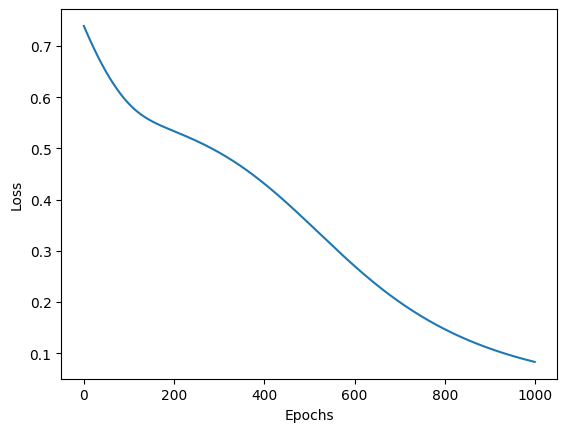

Training Losses are 
          0
0  0.669951
1  0.667080
2  0.664243
3  0.661440
4  0.658673
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[3042    2]
 [   0  956]]
Accuracy: 0.9995, Precision: 0.9979, Recall: 1.0000, F1-score: 0.9990

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995



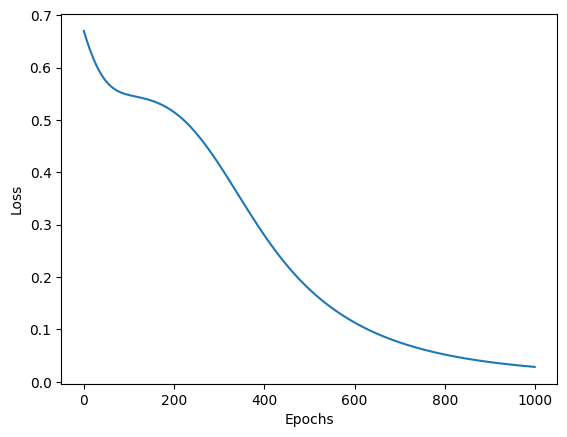

Training Losses are 
          0
0  0.693608
1  0.688029
2  0.682570
3  0.677233
4  0.672019
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[3043    1]
 [   1  955]]
Accuracy: 0.9995, Precision: 0.9990, Recall: 0.9990, F1-score: 0.9990



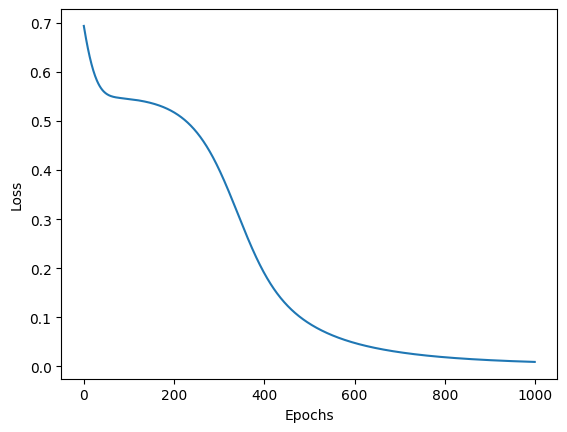

Training Losses are 
          0
0  0.607328
1  0.601378
2  0.595774
3  0.590521
4  0.585618
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



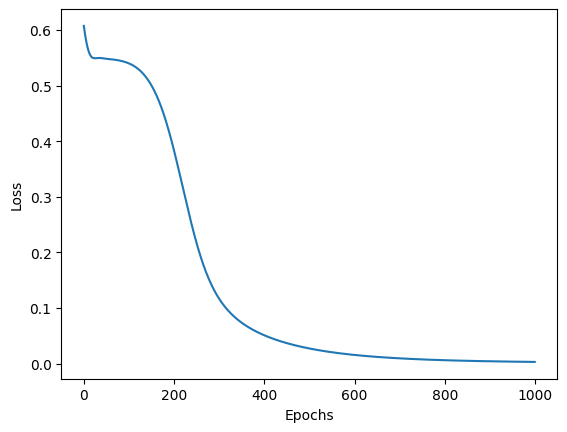

Training Losses are 
          0
0  0.666058
1  0.664357
2  0.662670
3  0.660996
4  0.659335
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[3043    1]
 [   4  952]]
Accuracy: 0.9988, Precision: 0.9990, Recall: 0.9958, F1-score: 0.9974



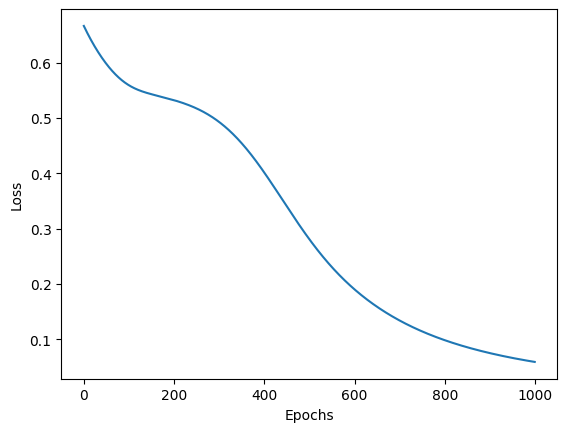

Training Losses are 
          0
0  0.664309
1  0.660979
2  0.657703
3  0.654481
4  0.651314
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[3042    2]
 [   0  956]]
Accuracy: 0.9995, Precision: 0.9979, Recall: 1.0000, F1-score: 0.9990

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995



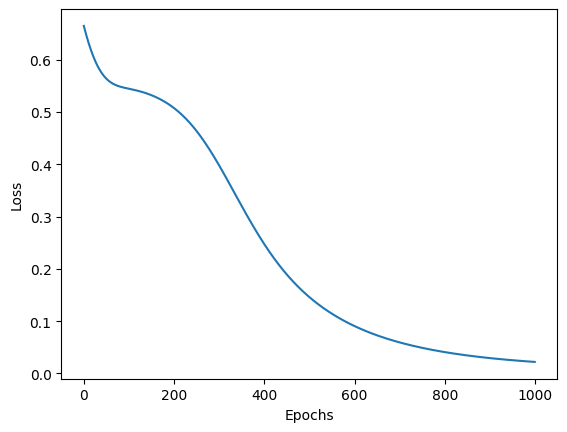

Training Losses are 
          0
0  0.775084
1  0.767339
2  0.759751
3  0.752321
4  0.745051
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[3043    1]
 [   1  955]]
Accuracy: 0.9995, Precision: 0.9990, Recall: 0.9990, F1-score: 0.9990



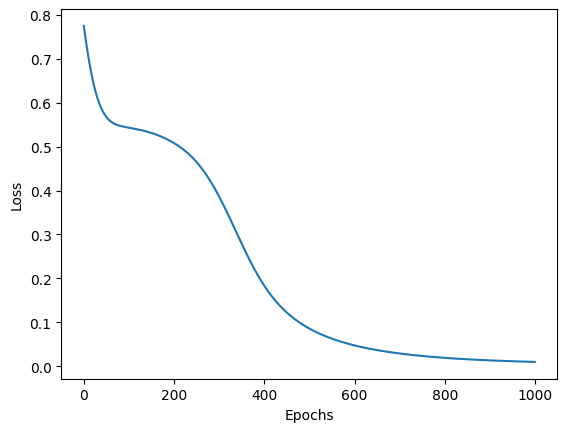

Training Losses are 
          0
0  0.712779
1  0.700897
2  0.689510
3  0.678625
4  0.668244
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



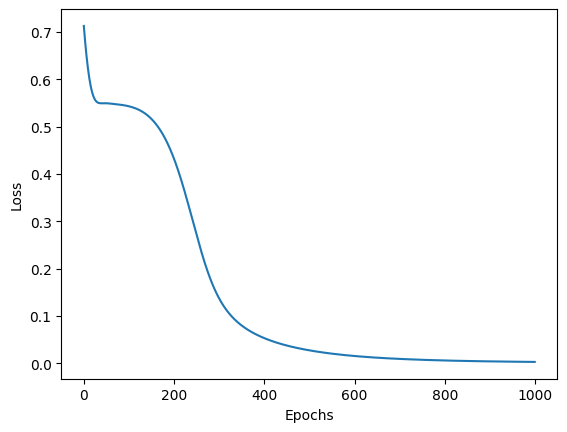

Training Losses are 
          0
0  0.659579
1  0.656545
2  0.653556
3  0.650614
4  0.647719
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[3042    2]
 [   1  955]]
Accuracy: 0.9992, Precision: 0.9979, Recall: 0.9990, F1-score: 0.9984

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[3043    1]
 [   3  953]]
Accuracy: 0.9990, Precision: 0.9990, Recall: 0.9969, F1-score: 0.9979



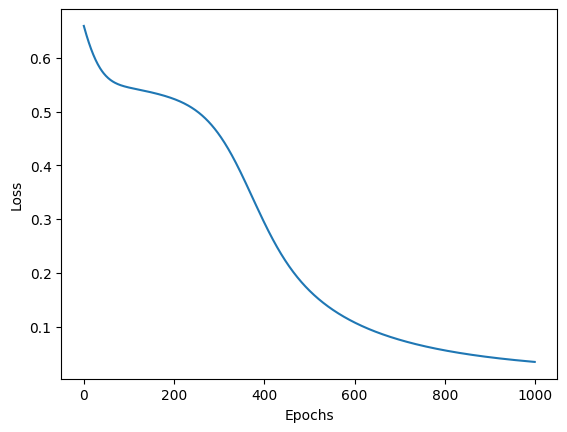

Training Losses are 
          0
0  0.691409
1  0.686258
2  0.681217
3  0.676289
4  0.671475
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[3044    0]
 [   2  954]]
Accuracy: 0.9995, Precision: 1.0000, Recall: 0.9979, F1-score: 0.9990



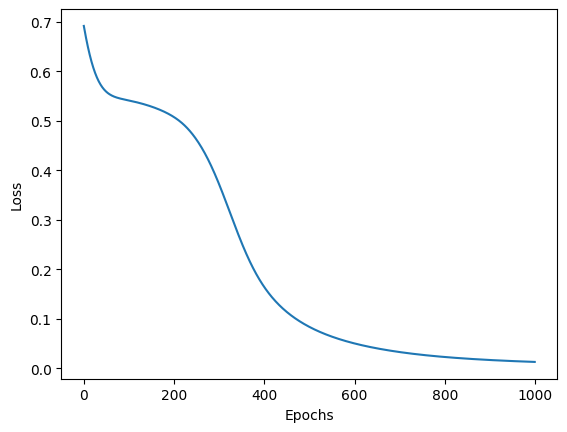

Training Losses are 
          0
0  0.745209
1  0.735532
2  0.726124
3  0.716988
4  0.708125
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[3043    1]
 [   1  955]]
Accuracy: 0.9995, Precision: 0.9990, Recall: 0.9990, F1-score: 0.9990

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[3043    1]
 [   3  953]]
Accuracy: 0.9990, Precision: 0.9990, Recall: 0.9969, F1-score: 0.9979



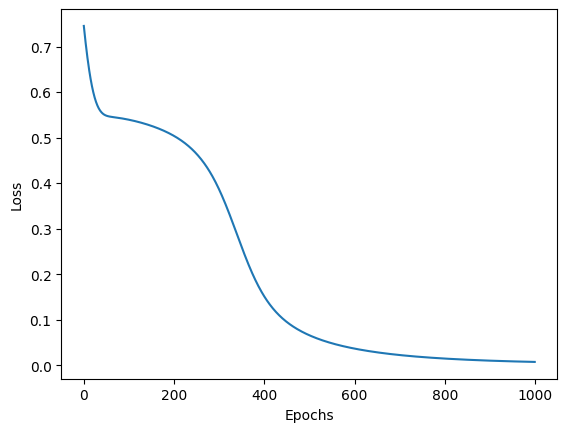

Training Losses are 
          0
0  0.800152
1  0.783390
2  0.767276
3  0.751813
4  0.737006
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[3043    1]
 [   0  956]]
Accuracy: 0.9998, Precision: 0.9990, Recall: 1.0000, F1-score: 0.9995

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[3044    0]
 [   1  955]]
Accuracy: 0.9998, Precision: 1.0000, Recall: 0.9990, F1-score: 0.9995



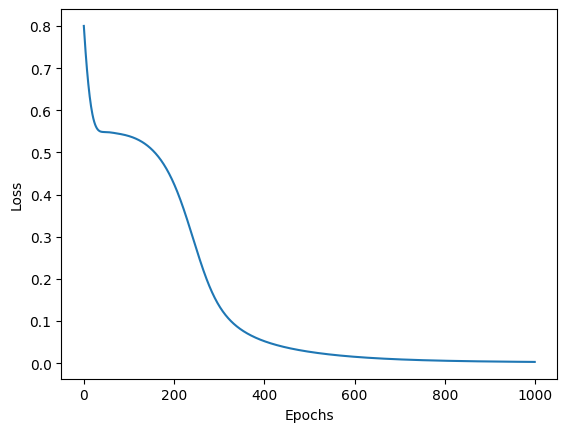

Training Losses are 
          0
0  0.699111
1  0.693111
2  0.687244
3  0.681516
4  0.675930
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[3043    1]
 [   2  954]]
Accuracy: 0.9992, Precision: 0.9990, Recall: 0.9979, F1-score: 0.9984



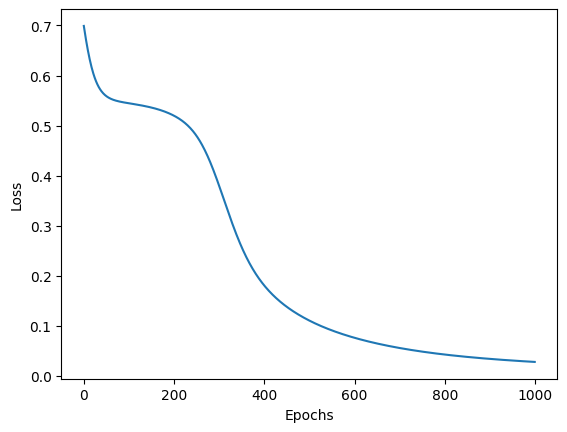

Training Losses are 
          0
0  0.695999
1  0.688761
2  0.681703
3  0.674829
4  0.668147
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[3044    0]
 [   1  955]]
Accuracy: 0.9998, Precision: 1.0000, Recall: 0.9990, F1-score: 0.9995



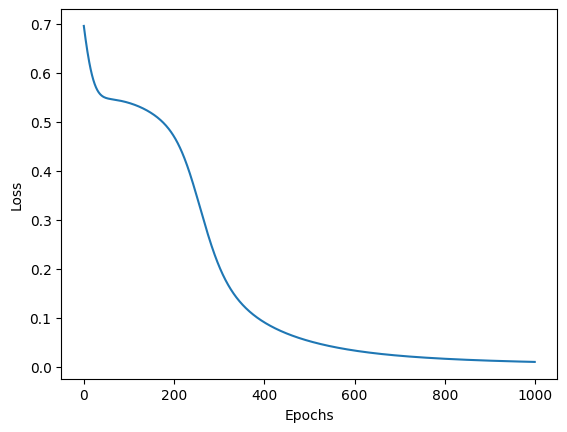

In [ ]:
nuerons = [8,16,32,64]
best_score=0
layer1=0
layer2=0
layer3=0
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = TripleLayer(34,nueron,double_nueron,triple_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      if acc > best_score:
          best_score=acc
          layer1=nueron
          layer2=double_nueron
          layer3=triple_nueron
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()
print(f"The best accuracy on test data is {best_score} for layers {layer1} , {layer2}, {layer3}")